<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Runge_Kutta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução às equações diferencias ordinárias:**

**Métodos de Runge Kutta e derivação numérica**


 *José Claudinei Ferrreira*

 *Universidade Federal de Alfenas (UNIFAL-MG)*

[Link](https://github.com/j-claudinei-f/j-claudinei-f/blob/main/DerivadaNumerica_Runge_Kutta.ipynb) sobre teoria.

Apresentamos exemplos de equações diferenciais que sabemos a solução analítica, para podermos pensar na desempenho dos métodos.

Vale lembrar que esses métodos são úteis mesmo nos casos em que não conhecemos a solução analítica da equação diferencial, ou quando ela tem uma forma muito complicada para lidarmos.

#**Exemplo 1**

Considere a equação diferencial ordinária
$$\begin{cases}u'(t)&=&u(t)\\u(0)=1
\end{cases},$$ que sabemos a solução, ou seja, que $$u(t)=e^t.$$

Vamos usar esta equação para testar a diferença entre os métodos.

**i)** Método de Euler, para calcular $u(1)$ aproximadamente. Vamos tomar o passo $h=1/n$, para $n=10$.

In [1]:
n=10
h=1/n

t0=0
u0=1

def F(t,u): # u'=F(t,u) equação diferencial
  return u

def Euler(v0,F):
  t=[t0]
  v=[v0]  # v0 é a condição inicial
  for i in range(0,n):
    v.append(v[i]+h*F(t[i],v[i]))
    t.append(t[i]+h)
  return [t,v]

t,u=Euler(u0,F)
print('t=',t)
print('\n u=',u)

t= [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]

 u= [1, 1.1, 1.2100000000000002, 1.3310000000000002, 1.4641000000000002, 1.61051, 1.7715610000000002, 1.9487171, 2.1435888100000002, 2.357947691, 2.5937424601]


Observando o gráfico de $u(t)=e^t$ e das aproximações:

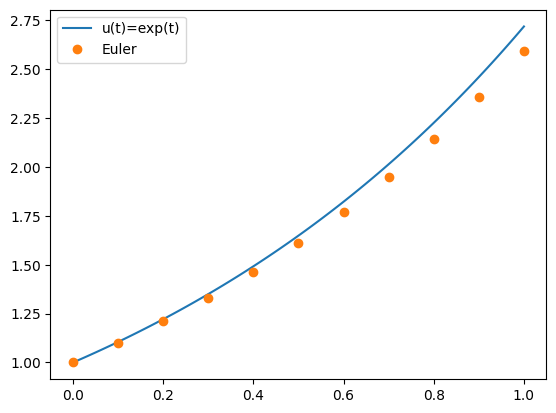

In [2]:
import matplotlib.pyplot as plt
import numpy as np

s=np.linspace(0,1,100)
y=np.exp(s)

plt.plot(s,y,label='u(t)=exp(t)')
plt.plot(t,u,'o',label='Euler')
plt.legend()
plt.show()

**ii)** Método de Runge-Kutta de ordem 2, para calcular $u(1)$ aproximadamente. Vamos tomar o passo $h=1/n$, para algum $n=10$.

Por exemplo, tomando
\begin{eqnarray*}
	x_p&=&t_0+ph\\
	k_1&=&F(x_p,y_p)\\
	k_2&=&F(x_p+h,y_p+hk_1)\end{eqnarray*}
obtemos um método dado por $$	y(x_p+h)\,\approx\,y_{p+1}=y_p+\frac{h}{2}\left(k_1+k_2\right),$$ para $p=1,\,2,\,\ldots n-1$. Esse método é conhecido como **método de Euler melhorado**.

In [3]:
def RK2(v0,F):
  t=[t0]
  v=[v0]  # v0 é a condição inicial
  for i in range(0,n):
    k1=F(t[i],v[i])
    k2=F(t[i]+h,v[i]+h*k1)
    v.append(v[i]+h*(k1+k2)/2)
    t.append(t[i]+h)
  return [t,v]

tr,ur=RK2(u0,F)
print('t=',tr)
print('\n u=',ur)

t= [0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]

 u= [1, 1.105, 1.221025, 1.349232625, 1.490902050625, 1.647446765940625, 1.8204286763643904, 2.0115736873826515, 2.22278892455783, 2.456181761636402, 2.714080846608224]


Gráficamente temos:

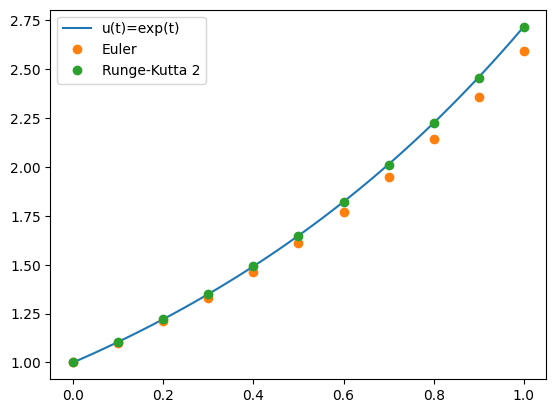

In [4]:
plt.plot(s,y,label='u(t)=exp(t)')
plt.plot(t,u,'o',label='Euler')
plt.plot(tr,ur,'o',label='Runge-Kutta 2')
plt.legend()
plt.show()

**ii)** Método de Runge-Kutta de ordem 4, para calcular $u(1)$ aproximadamente. Vamos tomar o passo $h=1/n$, para algum $n=4$.

Um método de Runge-Kutta de ordem 4 é dado por
\begin{eqnarray*}
	x_p&=&t_0+ph\\
	k_1&=&F(x_p,y_p)\\
	k_2&=&F(x_p+h/3,y_p+hk_1/3)\\
	k_3&=&F(x_p+2h/3,y_p-hk_1/3+hk_2)\\
	k_4&=&F(x_p+h,y_p+hk_1-hk_2+hk_3)\\
	y(x_p+h)\,\approx\,y_{p+1}&=&y_p+\frac{h}{8}\left(k_1+3(k_2+k_3)+k_4\right)
\end{eqnarray*}



In [5]:
n=4
h=1/n

def RK4(v0,F):
  t=[t0]
  v=[v0]  # v0 é a condição inicial
  for i in range(0,n):
    k1=F(t[i],v[i])
    k2=F(t[i]+h/3,v[i]+h*k1/3)
    k3=F(t[i]+2*h/3,v[i]-h*k1/3+h*k2)
    k4=F(t[i]+h,v[i]+h*k1-h*k2+h*k3)
    v.append(v[i]+h*(k1+3*(k2+k3)+k4)/8)
    t.append(t[i]+h)
  return [t,v]

tr4,ur4=RK4(u0,F)
print('t=',tr4)
print('\n u=',ur4)

t= [0, 0.25, 0.5, 0.75, 1.0]

 u= [1, 1.2840169270833333, 1.648699469036526, 2.1169580259162033, 2.718209939201323]


Gráficamente temos:

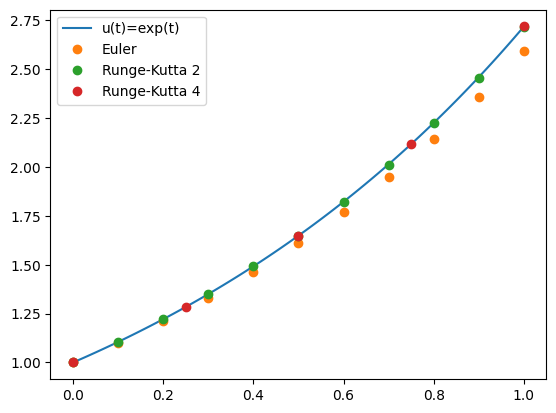

In [6]:
plt.plot(s,y,label='u(t)=exp(t)')
plt.plot(t,u,'o',label='Euler')
plt.plot(tr,ur,'o',label='Runge-Kutta 2')
plt.plot(tr4,ur4,'o',label='Runge-Kutta 4')
plt.legend()
plt.show()

Vemos graficamente que as aproximações melhoram quando a ordem do método aumenta. Mas os cálculos envolvidos em cada iteração aumentam também.

#**Exemplo 2**

Considere a equação diferencial $$\begin{cases}\displaystyle\frac{dU}{dx}&=&F(x,U)\\\\U(80)&=&\begin{bmatrix}0\\0\end{bmatrix}\end{cases},$$ em que
$$
U(x)=\left[\begin{array}{llll}y(x)\\ r(x)\end{array}\right],\qquad
F(x,U)=	\left[\begin{array}{llll}\displaystyle \frac{dy}{dx}\\\\\displaystyle\frac{dr}{dx}\end{array}\right]=\left[\begin{array}{llll}\displaystyle\frac{y(x)-r(x)}{x}\\\\-\displaystyle\frac{1}{2}\sqrt{1+\left(\frac{y(x)-r(x)}{x}\right)^2}\end{array}\right].$$

Como já vimos, está equação aparace no modelo para o delsocamento no problema do cachorro e do coelho. Podemos [checar](https://github.com/j-claudinei-f/j-claudinei-f/blob/main/Cachorro_coelho_introducao_EDO.ipynb) que
$$y=f(x)=\frac{(x-240) \sqrt{x}+160\sqrt{80}}{12 \sqrt{5}}$$ é uma das funções que estamos procurando.




In [ ]:
def f(s):               # Soulção exata y=f(x)
  pf=( (s-240)*np.sqrt(s)+160*np.sqrt(80))/(12*np.sqrt(5))
  return pf

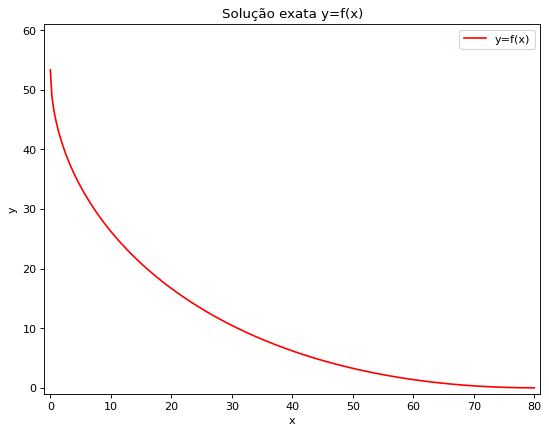

In [ ]:

xt=np.linspace(0,80,320+1)   # x varia de 0.25 em 0.25.
fp=f(xt)                     # pontos y=f(x).

Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
lines_plotted = plt.plot([])

line_plotted = lines_plotted[0]

plt.xlim(-1,80+1)

plt.ylim(-1,60+1)

plt.plot(xt,fp,color='red',label='y=f(x)')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.title('Solução exata y=f(x)')
plt.show()

In [ ]:
def F(s,U):                         # Equação U'=(u',v')=F(x,U), s=x, u=r (rabbit) e v=y (dog).
  y=U[0]
  r=U[1]
  dydx=(y-r)/s
  drdx=-np.sqrt(1+(dydx)**2)/2
  return np.array([dydx, drdx])

Já resolvemos essa equação pelo método de Euler:

In [ ]:
def Euler(m):                          # m é o número de passos para o método de Euler para resolver a equação u'(x)=F(x,u(x)), u(x)=(r(x),y(x)).
  L=80                                 # Dados de inicialização.
  h=(0-L)/m                            # passo para o método de Euler para resolver a equação u'=F(x,u).
  r=[]                                 # Vetor para guardar coordenadas discretas da posição do coelho (rabbit).
  d=[]                                 # Vetor para guardar coordenadas discretas da posição do cachorro (dog).
  d.append(np.array([L,0]))
  r.append(np.array([0,0]))
  U=[]                                 # Vetor para guardar a posição (x,y) do cachorro.
  U.append(np.array([0,0]))

  for i in range(1,m+1):               # Método de Euler u_(n+1)=u_n+hF(s_n,u_n)
      U.append(U[i-1]+h*F(d[i-1][0],U[i-1]))
      d.append([d[i-1][0]+h,U[i][0]])  # Obtendo (x,y(x)) aproximado.
      r.append([0,U[i][1]])            # Obtendo (0,r(x)) aproximado.
  return np.array([d,r])

Veja gráficamente, o caso $n=40$ e $h=2$:

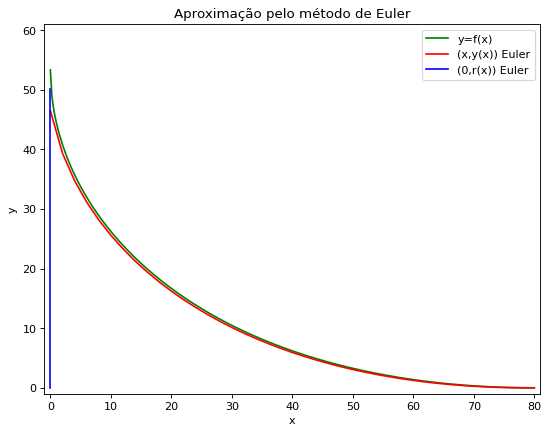

In [ ]:
E=Euler(40)

Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
lines_plotted = plt.plot([])

line_plotted = lines_plotted[0]

plt.xlim(-1,80+1)

plt.ylim(-1,60+1)
plt.plot(xt,fp,color='green',label='y=f(x)')

plt.plot([x[0] for x in E[0]], [x[1] for x in E[0]],label='(x,y(x)) Euler',color='red')
plt.plot([x[0] for x in E[1]], [x[1] for x in E[1]],label='(0,r(x)) Euler',color='blue')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.title('Aproximação pelo método de Euler')
plt.show()

Vamos utilizar agora
\begin{eqnarray*}
	x_p&=&t_0+ph\\
	k_1&=&F(x_p,y_p)\\
	k_2&=&F(x_p+h,y_p+hk_1)\end{eqnarray*}
para o método **método de Euler melhorado**, dado por $$	y(x_p+h)\,\approx\,y_{p+1}=y_p+\frac{h}{2}\left(k_1+k_2\right),$$ para $p=1,\,2,\,\ldots n-1$.

In [ ]:
def RK2(m):                          # m é o número de passos para o método de Euler para resolver a equação u'(x)=F(x,u(x)), u(x)=(r(x),y(x)).
  L=80                                 # Dados de inicialização.
  h=(0-L)/m                            # passo para o método de Euler para resolver a equação u'=F(x,u).
  r=[]                                 # Vetor para guardar coordenadas discretas da posição do coelho (rabbit).
  d=[]                                 # Vetor para guardar coordenadas discretas da posição do cachorro (dog).
  d.append(np.array([L,0]))
  r.append(np.array([0,0]))
  U=[]                                 # Vetor para guardar a posição (x,y) do cachorro.
  U.append(np.array([0,0]))

  for i in range(1,m+1):               # Método de Euler u_(n+1)=u_n+hF(s_n,u_n)
      k1=F(d[i-1][0],U[i-1])
      k2=F(d[i-1][0]+h,U[i-1]+h*k1)
      U.append(U[i-1]+h*(k1+k2)/2)
      d.append([d[i-1][0]+h,U[i][0]])
      r.append([0,U[i][1]])
  return np.array([d,r])

Vejamos gráficamante, para $n=40$ e $h=2$:

<ipython-input-70-b45c24450673>:4: RuntimeWarning: divide by zero encountered in double_scalars
  dydx=(y-r)/s


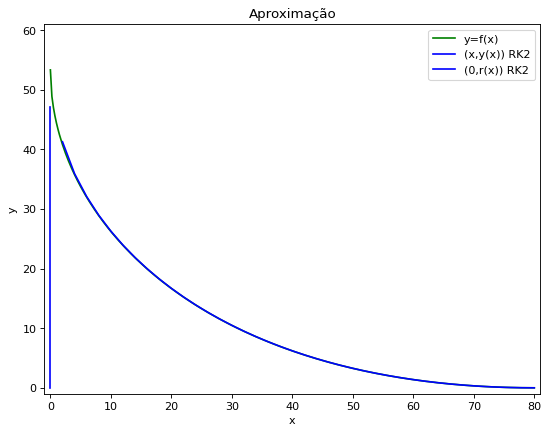

In [ ]:
Figure = plt.figure(figsize=(8,6), dpi=80) # criando gráficos
lines_plotted = plt.plot([])

line_plotted = lines_plotted[0]

plt.xlim(-1,80+1)

plt.ylim(-1,60+1)
plt.plot(xt,fp,color='green',label='y=f(x)')

E=RK2(40)
plt.plot([x[0] for x in E[0]], [x[1] for x in E[0]],label='(x,y(x)) RK2',color='blue')
plt.plot([x[0] for x in E[1]], [x[1] for x in E[1]],label='(0,r(x)) RK2',color='blue')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.title('Aproximação')
plt.show()

**Obs:** Note que temos um problema no final das iterações do método de Runge-Kutta de Ordem 2. Porque o cálculo de $k2$ gera uma divisão por 0, na expressão de $F(s,U)$, o que não ocorre com o método de Euler.